# Predicting Customer Churn for Internet Service Provider
### Source https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn 
Dataset provided by MEHMET SABRI KUNT on Kaggle

###  id
unique subscriber id

### is_tv_subscriber
customer has a tv subscription ?

### is_movie_package_subscriber
is he/she has a sinema movie package subs

### subscription_age
how many year has the customer use our service

### bill_avg
last 3 months bill avg

### reamining_contract
how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time have to use their service until contract end. if they canceled their service before contract time end they pay a penalty fare.

### service_failure_count
customer call count to call center for service failure for last 3 months

### download_avg
last 3 months internet usage (GB)

### upload_avg
last 3 months upload avg (GB)

### download_over_limit
most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Churn Predictions\internet_service_churn.csv")

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
df.rename(columns={'reamining_contract':'remaining_contract'}, inplace=True)

In [5]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [6]:
df.shape

(72274, 11)

In [7]:
df['remaining_contract'] =df['remaining_contract'].fillna(df['remaining_contract'].mean())

In [8]:
df.isnull().sum()

id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
remaining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [9]:
df['download_avg']=df['download_avg'].fillna(df['download_avg'].mean())

In [10]:
df['upload_avg']=df['upload_avg'].fillna(df['upload_avg'].mean())

Text(0, 0.5, 'download_avg')

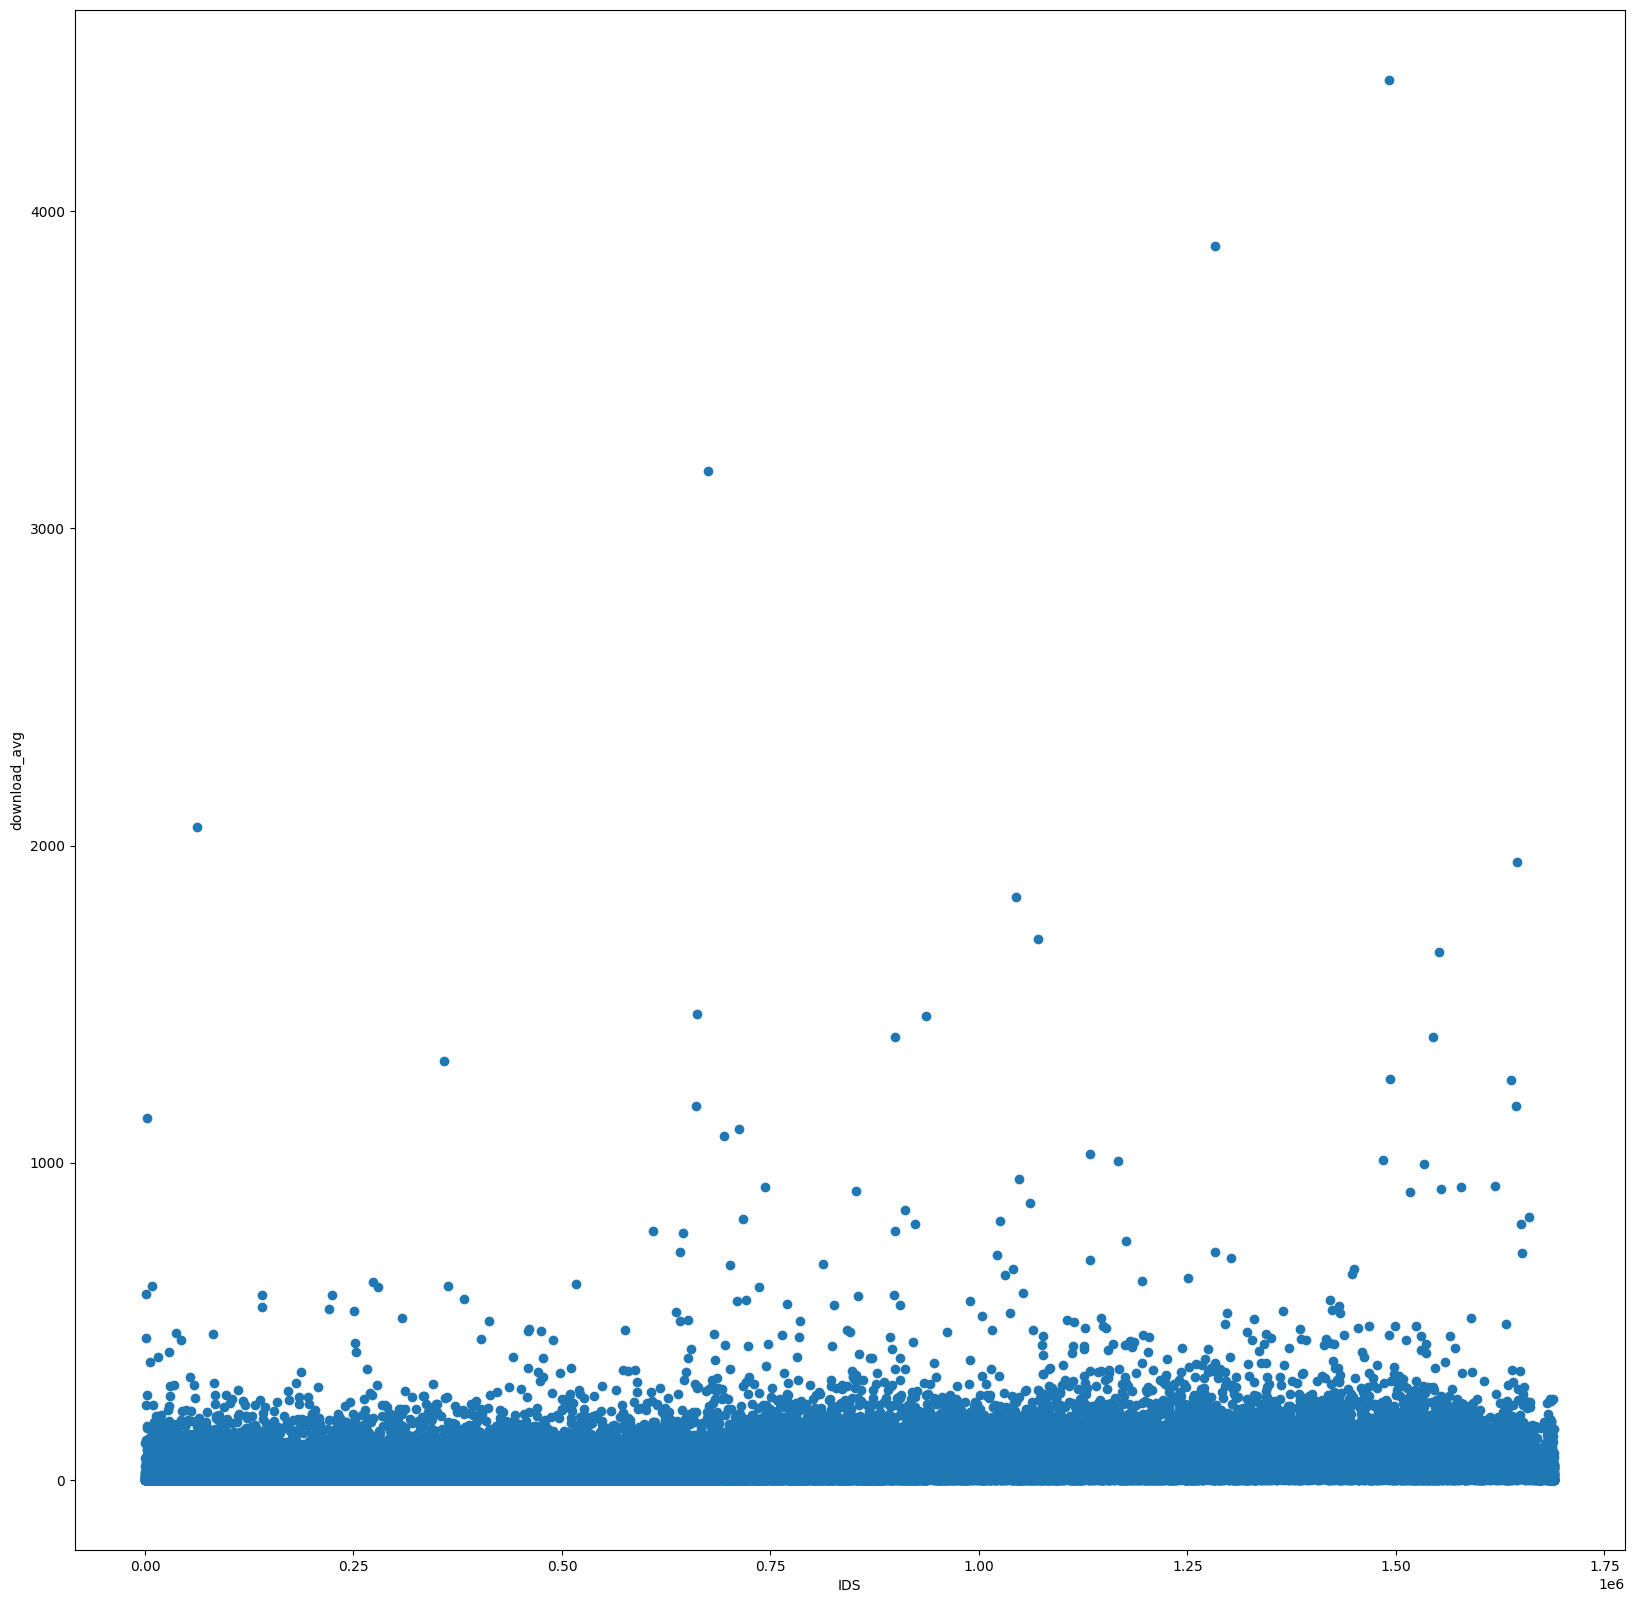

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(df['id'], df['download_avg'])
plt.xlabel('IDS')
plt.ylabel('download_avg')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'is_tv_subscriber'}>,
        <Axes: title={'center': 'is_movie_package_subscriber'}>],
       [<Axes: title={'center': 'subscription_age'}>,
        <Axes: title={'center': 'bill_avg'}>,
        <Axes: title={'center': 'remaining_contract'}>],
       [<Axes: title={'center': 'service_failure_count'}>,
        <Axes: title={'center': 'download_avg'}>,
        <Axes: title={'center': 'upload_avg'}>],
       [<Axes: title={'center': 'download_over_limit'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >]], dtype=object)

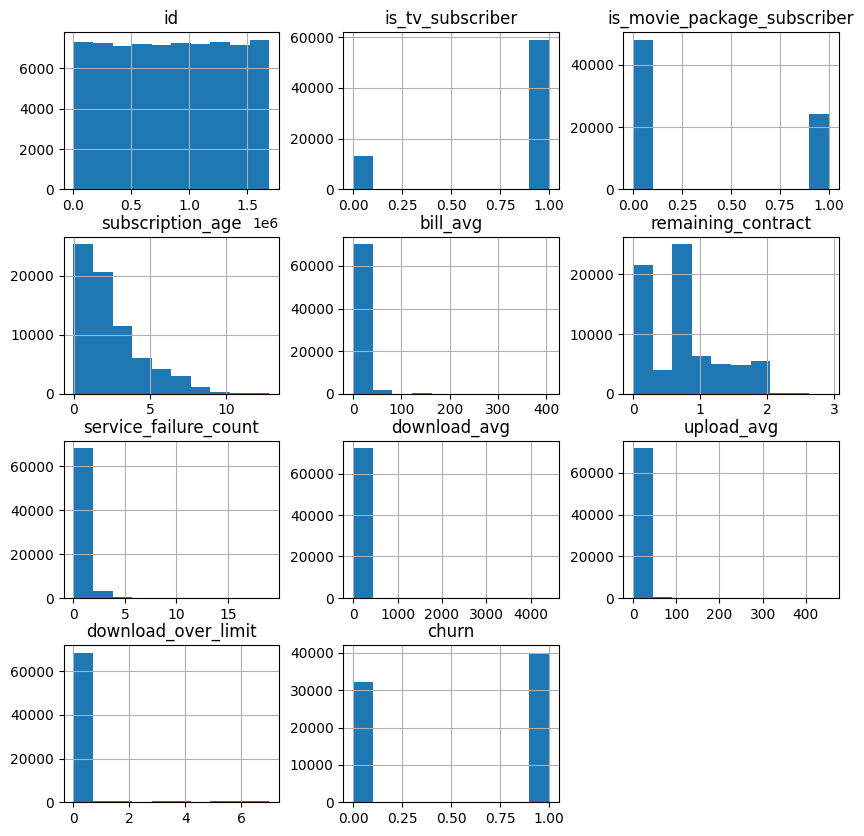

In [12]:
df.hist(figsize=(10,10))

In [13]:
X = df.drop(columns=['churn'])
y = df['churn']

imports the KNeighborsClassifier class from the sklearn.neighbors module.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

This line creates an instance of the KNeighborsClassifier class with a parameter of n_neighbors=3. Then splits the data into training and test sets using the train_test_split function. The function takes the data and the target as arguments and returns four values: X_train, X_test, y_train, and y_test. The function uses 80% of the data for training and 20% for testing.

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X.shape

(72274, 10)

In [17]:
y.shape

(72274,)

In [18]:
X_train.shape

(57819, 10)

In [19]:
y_train.shape

(57819,)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.score(X_test, y_test)

0.688135593220339

In [22]:
import numpy as np

In [23]:
neighbors = np.arange(1,13)
train_acc = {}
test_acc = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_acc, '\n', test_acc)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8378214773690309, 3: 0.8273404936093671, 4: 0.7963645168543212, 5: 0.7846728584029471, 6: 0.7726871789550148, 7: 0.7639184351164842, 8: 0.7583839222400941, 9: 0.7527456372472716, 10: 0.7493211574050053, 11: 0.7456199519189194, 12: 0.7433715560628859} 
 {1: 0.6664821860947769, 2: 0.6547215496368038, 3: 0.688135593220339, 4: 0.6861293670010377, 5: 0.7010031131096507, 6: 0.6983742649602214, 7: 0.7057073676928398, 8: 0.7037703216879972, 9: 0.7085437564856452, 10: 0.7089588377723971, 11: 0.7122103078519544, 12: 0.7113109650639917}


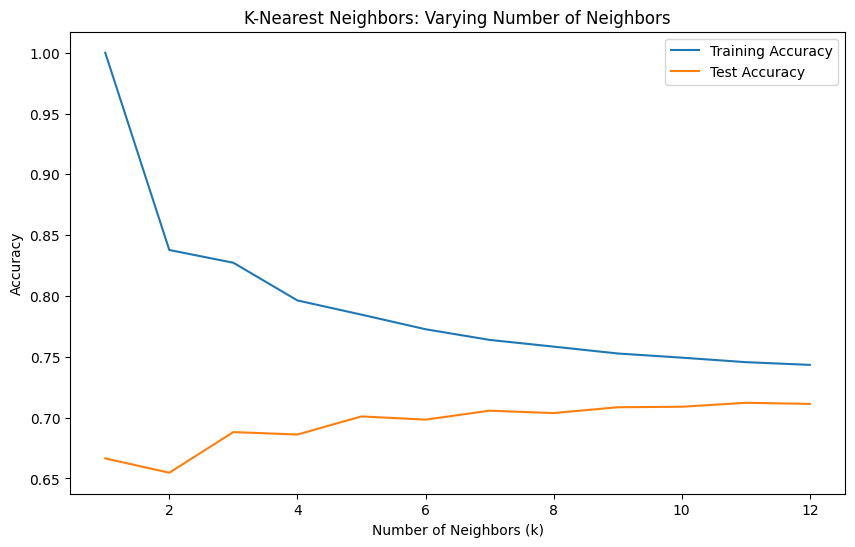

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_acc.values()), label='Training Accuracy')
plt.plot(neighbors, list(test_acc.values()), label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors: Varying Number of Neighbors')
plt.legend()
plt.show()


In [25]:
knn = KNeighborsClassifier(n_neighbors=11)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [38]:
print('Accuracy Score: ', accuracy, '\n')
print('Confusion Matrix: \n', c_matrix, '\n')
print('Classification Report: \n', class_report)

Accuracy Score:  0.7122103078519544 

Confusion Matrix: 
 [[4064 2381]
 [1779 6231]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.63      0.66      6445
           1       0.72      0.78      0.75      8010

    accuracy                           0.71     14455
   macro avg       0.71      0.70      0.71     14455
weighted avg       0.71      0.71      0.71     14455

